In [34]:
# !pip install CBFV

In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from CBFV.composition import generate_features

In [36]:
# from google.colab import drive
# drive.mount('/content/drive')

In [37]:
PATH = os.getcwd()
data_path = os.path.join(PATH, './data/C2DB_clean.csv')
df = pd.read_csv(data_path)

df.head(10)

,Formula,Band gap
0,As4O8,3.232
1,Ca4As4,0.998
2,In2Se2,1.630
3,Sc4S6,1.515
4,V2O5,1.356
5,Zr2Te10,0.191
6,Al2MgSe4,1.064
7,Cr2Br2O2,0.501
8,Hf2Ge2Te8,0.565
9,In4I4Te4,1.732


In [38]:
rename_dict = {'Formula': 'formula', 'Band gap': 'target'}
df = df.rename(columns=rename_dict)
df.head()

,formula,target
0,As4O8,3.232
1,Ca4As4,0.998
2,In2Se2,1.630
3,Sc4S6,1.515
4,V2O5,1.356


In [39]:
X_train_unscaled, y_train, formulae_train, skipped_train = generate_features(df, elem_prop='oliynyk', drop_duplicates=False, extend_features=False, sum_feat=True)

Processing Input Data: 100%|██████████████████████████████████| 1450/1450 [00:00<00:00, 23891.94it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████████████████████████████| 1450/1450 [00:00<00:00, 10821.83it/s]


	Creating Pandas Objects...


In [40]:
SEED = 42
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X_train_unscaled, y_train, test_size=0.20, random_state=SEED)

In [41]:
X_train = (X_train_unscaled)
X_test = (X_test_unscaled)

In [42]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_unscaled)
# X_val = scaler.transform(X_val_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [43]:
from time import time
ti = time()

model = ExtraTreesRegressor()
model.fit(X_train, y_train)

dt = time() - ti
print(f'Finished fitting best model, total time: {dt:0.2f} s')

Finished fitting best model, total time: 4.66 s


In [44]:
#save model
from joblib import dump, load
dump(model, './save_model/oliynyk_ExtraTreesRegressor_WS.joblib') 
#load model
# model = load('/content/drive/MyDrive/jupyter/SuperCon/save_model/oliynyk_ExtraTreesRegressor.joblib') 

['./save_model/oliynyk_ExtraTreesRegressor_WS.joblib']

In [45]:
y_act_test = y_test
y_pred_test = model.predict(X_test)

r2 = r2_score(y_act_test, y_pred_test)
mae = mean_absolute_error(y_act_test, y_pred_test)
rmse = mean_squared_error(y_act_test, y_pred_test, squared=False)
print(f'r2: {r2:0.4f}')
print(f'mae: {mae:0.4f}')
print(f'rmse: {rmse:0.4f}')


r2: 0.7874
mae: 0.4203
rmse: 0.6176


In [46]:
# y_act_test = y_test
# y_pred_test = model.predict(X_test)

# r2 = r2_score(y_act_test, y_pred_test)
# mae = mean_absolute_error(y_act_test, y_pred_test)
# rmse = mean_squared_error(y_act_test, y_pred_test, squared=False)
# print(f'r2: {r2:0.4f}')
# print(f'mae: {mae:0.4f}')
# print(f'rmse: {rmse:0.4f}')


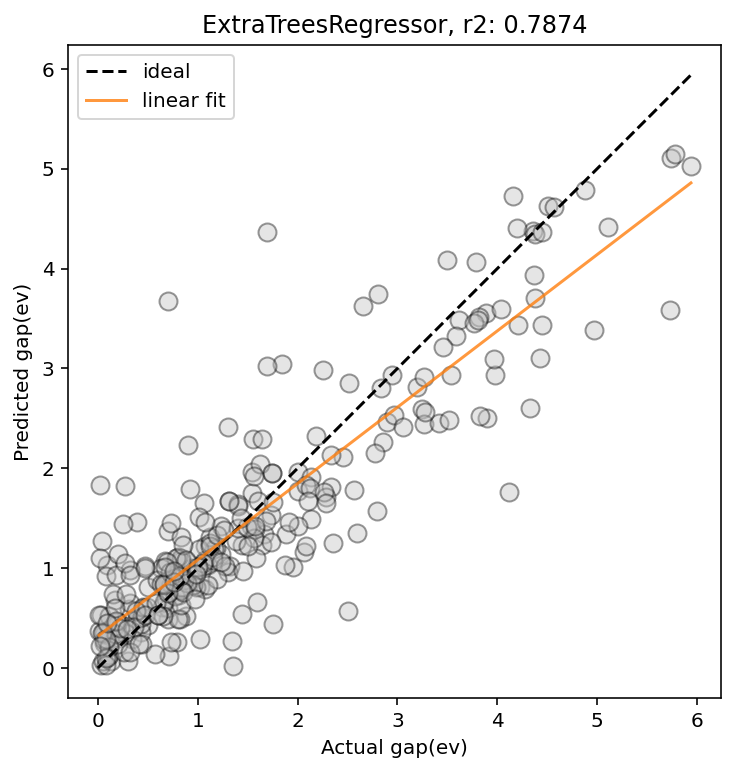

In [47]:
reg_line=True # set true or false
xy_max = np.max([np.max(y_act_test), np.max(y_pred_test)])

plot = plt.figure(figsize=(6,6))
plt.plot(y_act_test, y_pred_test, 'o', ms=9, mec='k', mfc='silver', alpha=0.4)
plt.plot([0, xy_max], [0, xy_max], 'k--', label='ideal')
if reg_line:
    polyfit = np.polyfit(y_act_test, y_pred_test, deg=1)
    reg_ys = np.poly1d(polyfit)(np.unique(y_act_test))
    plt.plot(np.unique(y_act_test), reg_ys, alpha=0.8, label='linear fit')
plt.axis('scaled')
label='gap(ev)'
plt.xlabel(f'Actual {label}')
plt.ylabel(f'Predicted {label}')
plt.title(f'{type(model).__name__}, r2: {r2_score(y_act_test, y_pred_test):0.4f}')
plt.legend(loc='upper left')


In [48]:
#HPO
model.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [49]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
from sklearn.model_selection import GridSearchCV
from time import time
params = [{'min_samples_leaf': [1,2,3,4,5],
         'min_samples_split': [2,3,4,5],
         'n_estimators': [100,200,300,400,500]}]
gs_model = GridSearchCV(model,
                      param_grid=params,
                      scoring='r2',
                      cv=5)
ti = time ()
gs_model.fit(X_train, y_train)
dt = time() -ti
print(dt)
gs_model.best_params_

In [ ]:
# find best model score
gs_model.score(X_train, y_train)

Saving final model

In [ ]:
# scaler = StandardScaler()

# X_train = scaler.fit_transform(X_train_unscaled)
# # X_val = scaler.transform(X_val_unscaled)
# # X_test = scaler.transform(X_test_unscaled)

In [ ]:
# from time import time
# ti = time()

# model = ExtraTreesRegressor()
# model.fit(X_train, y_train)

# dt = time() - ti
# print(f'Finished fitting best model, total time: {dt:0.2f} s')

In [ ]:
# #save model
# from joblib import dump, load
# dump(model, '/content/drive/MyDrive/jupyter/SuperCon/save_model/oliynyk_ExtraTreesRegressor_full.joblib') 
# #load model
# # model = load('/content/drive/MyDrive/jupyter/SuperCon/save_model/oliynyk_ExtraTreesRegressor_full.joblib') 